In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder,KBinsDiscretizer
from sklearn.pipeline import Pipeline
import numpy as np


In [183]:
data=pd.read_csv('Alzheimer/alzheimers_prediction_dataset.csv')
data.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [185]:
data[data.duplicated()]

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis


In [186]:
for column in data.columns:
    print(data[column].value_counts())
    print('################################\n')

Country
Brazil          3839
Germany         3807
Australia       3787
Russia          3778
South Africa    3760
Japan           3751
India           3741
South Korea     3732
Argentina       3731
Italy           3724
Canada          3711
France          3710
Norway          3706
Spain           3698
Sweden          3689
Saudi Arabia    3662
UK              3651
USA             3616
Mexico          3598
China           3592
Name: count, dtype: int64
################################

Age
72    1731
82    1712
64    1709
60    1703
50    1701
76    1690
69    1684
65    1684
61    1684
71    1682
54    1681
62    1677
80    1673
51    1672
75    1671
81    1670
86    1668
94    1665
90    1665
66    1659
89    1656
59    1655
67    1655
57    1655
88    1653
93    1649
87    1644
63    1641
79    1641
78    1632
83    1629
53    1625
74    1624
91    1622
52    1616
56    1615
55    1614
58    1612
70    1611
92    1607
85    1602
73    1596
84    1595
77    1577
68    1576
Name: count, 

In [187]:
data.groupby('Country')['Alzheimer’s Diagnosis'].count()

Country
Argentina       3731
Australia       3787
Brazil          3839
Canada          3711
China           3592
France          3710
Germany         3807
India           3741
Italy           3724
Japan           3751
Mexico          3598
Norway          3706
Russia          3778
Saudi Arabia    3662
South Africa    3760
South Korea     3732
Spain           3698
Sweden          3689
UK              3651
USA             3616
Name: Alzheimer’s Diagnosis, dtype: int64

<Axes: xlabel='Country'>

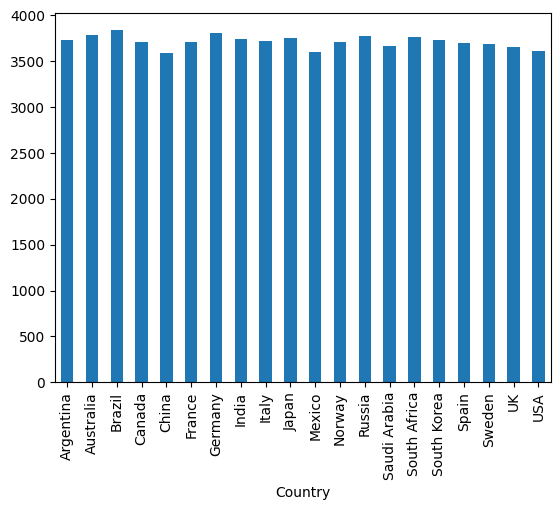

In [188]:
data.groupby('Country')['Alzheimer’s Diagnosis'].count().plot.bar()

In [189]:
data.groupby(['Smoking Status','Alcohol Consumption','Alzheimer’s Diagnosis'])['Alzheimer’s Diagnosis'].count()

Smoking Status  Alcohol Consumption  Alzheimer’s Diagnosis
Current         Never                No                       4882
                                     Yes                      3387
                Occasionally         No                       4865
                                     Yes                      3425
                Regularly            No                       4911
                                     Yes                      3445
Former          Never                No                       4852
                                     Yes                      3386
                Occasionally         No                       4755
                                     Yes                      3379
                Regularly            No                       4860
                                     Yes                      3396
Never           Never                No                       4925
                                     Yes                      3433
   

In [190]:
data.groupby(['Dietary Habits','Alzheimer’s Diagnosis'])['Alzheimer’s Diagnosis'].count()

Dietary Habits  Alzheimer’s Diagnosis
Average         No                       14636
                Yes                      10281
Healthy         No                       14535
                Yes                      10153
Unhealthy       No                       14399
                Yes                      10279
Name: Alzheimer’s Diagnosis, dtype: int64

<Axes: xlabel='Dietary Habits,Alzheimer’s Diagnosis'>

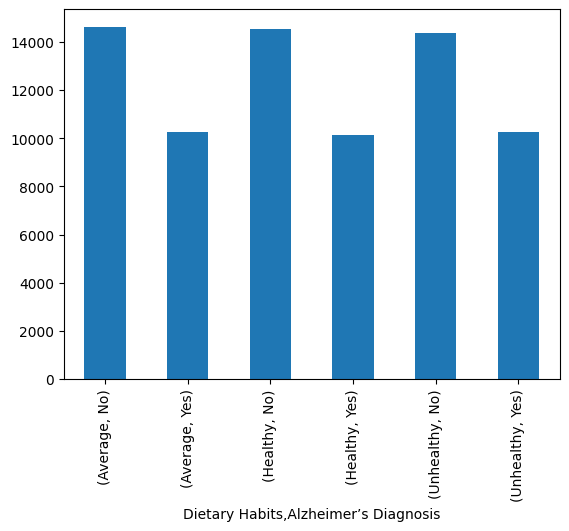

In [191]:
data.groupby(['Dietary Habits','Alzheimer’s Diagnosis'])['Alzheimer’s Diagnosis'].count().plot.bar()

In [192]:
data.groupby(['Gender','Alzheimer’s Diagnosis'])['Alzheimer’s Diagnosis'].count()

Gender  Alzheimer’s Diagnosis
Female  No                       21873
        Yes                      15376
Male    No                       21697
        Yes                      15337
Name: Alzheimer’s Diagnosis, dtype: int64

In [193]:
data.Diabetes.value_counts()

Diabetes
No     59527
Yes    14756
Name: count, dtype: int64

In [194]:
data.Hypertension.value_counts()

Hypertension
No     52134
Yes    22149
Name: count, dtype: int64

In [195]:
data.groupby(['Diabetes','Hypertension','Alzheimer’s Diagnosis'])['Alzheimer’s Diagnosis'].count()

Diabetes  Hypertension  Alzheimer’s Diagnosis
No        No            No                       24418
                        Yes                      17295
          Yes           No                       10458
                        Yes                       7356
Yes       No            No                        6141
                        Yes                       4280
          Yes           No                        2553
                        Yes                       1782
Name: Alzheimer’s Diagnosis, dtype: int64

In [196]:
data.groupby(['Genetic Risk Factor (APOE-ε4 allele)','Alzheimer’s Diagnosis'])['Alzheimer’s Diagnosis'].count()

Genetic Risk Factor (APOE-ε4 allele)  Alzheimer’s Diagnosis
No                                    No                       37771
                                      Yes                      21790
Yes                                   No                        5799
                                      Yes                       8923
Name: Alzheimer’s Diagnosis, dtype: int64

In [197]:
data.groupby(['Family History of Alzheimer’s','Alzheimer’s Diagnosis'])['Alzheimer’s Diagnosis'].count()

Family History of Alzheimer’s  Alzheimer’s Diagnosis
No                             No                       32864
                               Yes                      19140
Yes                            No                       10706
                               Yes                      11573
Name: Alzheimer’s Diagnosis, dtype: int64

In [198]:
data.groupby(['Stress Levels','Depression Level','Alzheimer’s Diagnosis'])['Alzheimer’s Diagnosis'].count()

Stress Levels  Depression Level  Alzheimer’s Diagnosis
High           High              No                       4828
                                 Yes                      3377
               Low               No                       4788
                                 Yes                      3493
               Medium            No                       4762
                                 Yes                      3419
Low            High              No                       4800
                                 Yes                      3494
               Low               No                       4746
                                 Yes                      3287
               Medium            No                       5000
                                 Yes                      3403
Medium         High              No                       4818
                                 Yes                      3365
               Low               No                       4971


In [199]:
data.Age.max() , data.Age.min()

(94, 50)

<Axes: ylabel='count'>

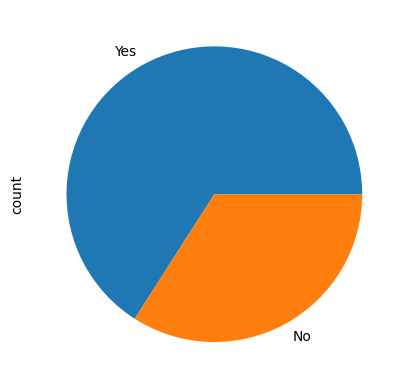

In [200]:
data[data.Age>75]['Alzheimer’s Diagnosis'].value_counts().plot.pie()

<Axes: ylabel='count'>

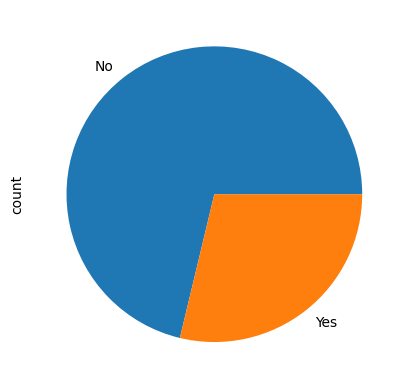

In [201]:
mask=(data.Age>60) & (data.Age<75)
data[mask]['Alzheimer’s Diagnosis'].value_counts().plot.pie()

<Axes: ylabel='count'>

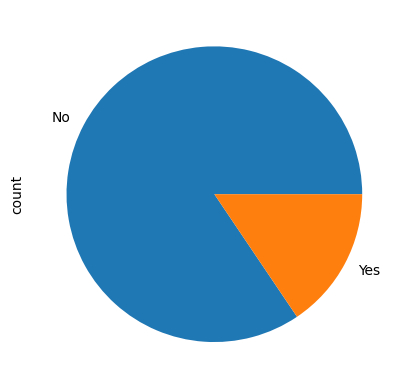

In [202]:
mask=(data.Age>50) & (data.Age<60)
data[mask]['Alzheimer’s Diagnosis'].value_counts().plot.pie()

In [203]:
mask=(data.Age>75) & (data['Alzheimer’s Diagnosis']=='Yes')
has_alzheimer_age_gt_75=data[mask]
has_alzheimer_age_gt_75.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
14,Italy,86,Male,10,32.1,Low,Never,Never,No,No,...,Average,Medium,Unemployed,Widowed,No,Low,Low,Medium,Urban,Yes
20,Japan,82,Female,15,30.9,Low,Current,Occasionally,No,No,...,Unhealthy,Medium,Employed,Single,No,High,Low,Medium,Urban,Yes
22,South Africa,76,Male,11,19.3,High,Current,Never,No,No,...,Average,High,Unemployed,Married,No,Low,Medium,Medium,Rural,Yes
24,South Korea,87,Male,12,20.5,High,Current,Never,No,Yes,...,Unhealthy,High,Employed,Married,No,Medium,Medium,Medium,Rural,Yes
33,Saudi Arabia,90,Female,16,27.2,Low,Never,Never,No,Yes,...,Healthy,Low,Unemployed,Single,No,Medium,High,Medium,Urban,Yes


In [204]:
has_alzheimer_age_gt_75.pivot_table(index=['Physical Activity Level','Alcohol Consumption'],values=['BMI'])

BMI
Physical Activity Level Alcohol Consumption           
High                    Never                26.916601
                        Occasionally         26.799657
                        Regularly            26.879181
Low                     Never                26.573006
                        Occasionally         26.664551
                        Regularly            26.694208
Medium                  Never                26.776512
                        Occasionally         26.852654
                        Regularly            26.824956

In [205]:
has_alzheimer_age_gt_75.pivot_table(index=['Country'],values=['Cognitive Test Score'],columns=['Smoking Status'],aggfunc='mean',margins=True,fill_value=0)

Cognitive Test Score                                 
Smoking Status              Current     Former      Never        All
Country                                                             
Argentina                 65.159420  64.148810  63.877143  64.394762
Australia                 64.631579  65.102719  63.607450  64.438040
Brazil                    65.045333  63.880000  64.162413  64.353091
Canada                    65.910072  64.121795  64.930380  64.952539
China                     64.896774  62.475570  65.298413  64.234979
France                    64.059524  67.109792  66.094017  65.760742
Germany                   65.886040  64.130919  65.128655  65.040875
India                     63.133676  63.669136  64.420765  63.726724
Italy                     65.012780  63.620482  64.896254  64.506048
Japan                     63.104693  65.816327  64.858434  64.632337
Mexico                    64.219072  63.403743  65.294766  64.295111
Norway                    65.287879  64.860000  65.650177  65.259584
Russia                    65.315245  63.877069  64.767016  64.629195
Saudi Arabia              64.098592  65.707692  64.603989  64.777886
South Africa              64.620155  64.820331  64.317848  64.588187
South Korea               62.918256  65.531915  64.470109  64.263158
Spain                     63.428152  65.058632  67.122507  65.227227
Sweden                    64.054487  65.000000  63.489583  64.187987
UK                        63.730769  66.201780  64.094955  64.699797
USA                       65.293930  64.471098  64.346801  64.701883
All                       64.480885  64.616990  64.764001  64.621324

#### According to the CDC, a body mass index (BMI) of 30 or more is considered obese. 

In [206]:
data[data['Age']>75].groupby('Alzheimer’s Diagnosis')['BMI'].agg(['min','max','mean'])

,min,max,mean
Alzheimer’s Diagnosis,,,
No,18.5,35.0,26.823093
Yes,18.5,35.0,26.776458


In [207]:
data[data['Age']>75].groupby(['Alzheimer’s Diagnosis','Gender'])['BMI'].agg(['min','max','mean'])

min   max       mean
Alzheimer’s Diagnosis Gender                       
No                    Female  18.5  35.0  26.782646
                      Male    18.5  35.0  26.862966
Yes                   Female  18.5  35.0  26.770698
                      Male    18.5  35.0  26.782192

In [208]:
has_alzheimer_age_gt_75[has_alzheimer_age_gt_75.BMI>30]

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
14,Italy,86,Male,10,32.1,Low,Never,Never,No,No,...,Average,Medium,Unemployed,Widowed,No,Low,Low,Medium,Urban,Yes
20,Japan,82,Female,15,30.9,Low,Current,Occasionally,No,No,...,Unhealthy,Medium,Employed,Single,No,High,Low,Medium,Urban,Yes
42,India,84,Male,11,30.4,Low,Former,Occasionally,No,Yes,...,Average,Low,Retired,Married,No,Low,Low,High,Urban,Yes
47,Russia,78,Male,8,33.8,Low,Former,Never,No,No,...,Healthy,High,Retired,Widowed,No,Low,High,High,Rural,Yes
55,Germany,76,Male,3,33.6,Medium,Never,Never,No,No,...,Unhealthy,Low,Unemployed,Single,No,Low,Low,High,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74145,South Africa,77,Male,3,31.3,Low,Current,Regularly,No,No,...,Average,Low,Employed,Widowed,Yes,High,Low,Low,Rural,Yes
74170,Brazil,86,Male,6,31.1,Low,Former,Never,No,Yes,...,Healthy,Medium,Employed,Single,No,High,Medium,High,Rural,Yes
74203,Russia,84,Female,17,31.5,High,Never,Occasionally,No,No,...,Average,High,Retired,Single,No,High,Low,Medium,Rural,Yes
74205,France,82,Female,17,30.9,High,Former,Regularly,No,No,...,Unhealthy,High,Employed,Widowed,No,Low,Medium,Medium,Urban,Yes


In [209]:
obesity_pct=round(len(has_alzheimer_age_gt_75[has_alzheimer_age_gt_75.BMI>30])/len(has_alzheimer_age_gt_75)*100,2)
obesity_pct

29.77

In [210]:
has_alzheimer_age_gt_75.Gender.value_counts()

Gender
Male      10327
Female    10279
Name: count, dtype: int64

<Axes: ylabel='count'>

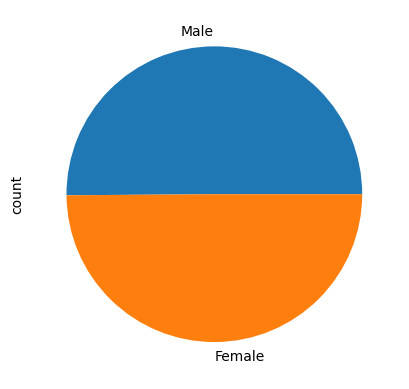

In [211]:
has_alzheimer_age_gt_75.Gender.value_counts().plot.pie()

In [212]:
has_alzheimer_age_gt_75[has_alzheimer_age_gt_75.BMI>30]['Gender'].value_counts()

Gender
Male      3109
Female    3025
Name: count, dtype: int64

<Axes: ylabel='count'>

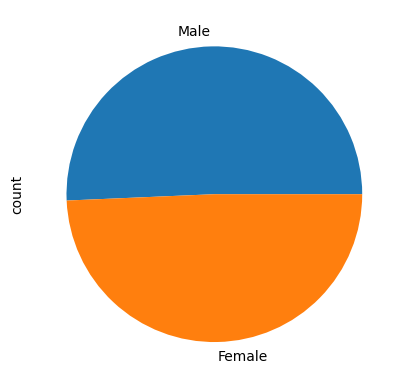

In [213]:
has_alzheimer_age_gt_75[has_alzheimer_age_gt_75.BMI>30]['Gender'].value_counts().plot.pie()

In [214]:
has_alzheimer_age_gt_75[has_alzheimer_age_gt_75.BMI>30][['Physical Activity Level','Gender']].value_counts()

Physical Activity Level  Gender
High                     Male      1091
Medium                   Female    1045
                         Male      1026
High                     Female    1008
Low                      Male       992
                         Female     972
Name: count, dtype: int64

In [215]:
has_alzheimer_age_gt_75.groupby(['Diabetes','Hypertension','Social Engagement Level'])['Social Engagement Level'].count()

Diabetes  Hypertension  Social Engagement Level
No        No            High                       3783
                        Low                        3906
                        Medium                     3941
          Yes           High                       1636
                        Low                        1635
                        Medium                     1609
Yes       No            High                        921
                        Low                         904
                        Medium                     1026
          Yes           High                        404
                        Low                         412
                        Medium                      429
Name: Social Engagement Level, dtype: int64

In [216]:
has_alzheimer_age_gt_75.groupby(['Alcohol Consumption','Social Engagement Level'])['Social Engagement Level'].count()

Alcohol Consumption  Social Engagement Level
Never                High                       2234
                     Low                        2247
                     Medium                     2292
Occasionally         High                       2273
                     Low                        2301
                     Medium                     2360
Regularly            High                       2237
                     Low                        2309
                     Medium                     2353
Name: Social Engagement Level, dtype: int64

In [217]:
has_alzheimer_age_gt_75.groupby(['Alcohol Consumption','Country'])['Country'].agg(['count']).sort_values(by='count',ascending=False)

count
Alcohol Consumption Country            
Never               South Africa    419
Regularly           India           410
Occasionally        South Africa    409
                    Russia          408
Regularly           Brazil          397
Never               Russia          395
Occasionally        Brazil          393
Never               Brazil          391
Regularly           South Africa    391
Never               India           391
Regularly           Russia          389
Never               Mexico          385
Occasionally        Mexico          374
Regularly           Australia       371
                    Mexico          366
Occasionally        Argentina       366
Regularly           France          363
Never               South Korea     363
Occasionally        India           359
                    South Korea     355
                    Germany         355
                    Spain           353
                    Saudi Arabia    352
Never               Germany         351
Occasionally        Australia       349
Regularly           Germany         346
                    South Korea     346
Never               Argentina       344
Regularly           Saudi Arabia    343
Occasionally        Canada          341
Regularly           Spain           341
                    Italy           339
Never               UK              338
Occasionally        France          337
Never               Italy           337
                    Saudi Arabia    336
Regularly           UK              336
Occasionally        China           334
Regularly           USA             329
Occasionally        USA             327
Never               France          324
                    Australia       321
Regularly           Argentina       321
Occasionally        Italy           316
Regularly           Japan           314
                    Norway          313
Occasionally        UK              312
Never               Spain           305
Occasionally        Sweden          303
Never               China           301
                    Norway          300
                    USA             300
Occasionally        Norway          300
Regularly           Sweden          299
Never               Japan           298
                    Sweden          297
Regularly           China           297
Occasionally        Japan           291
Regularly           Canada          288
Never               Canada          277

### Cognitive Test Score
#### When referring to an Alzheimer's test score out of 100, it usually relates to the "Addenbrooke's Cognitive Examination III (ACE-III)," where a score below 82 is often considered indicative of dementia, meaning a score of 82 or higher would be considered closer to normal out of a possible 100 points. 

In [218]:
data.groupby('Alzheimer’s Diagnosis')['Cognitive Test Score'].agg(['min','max','mean'])

,min,max,mean
Alzheimer’s Diagnosis,,,
No,30,99,64.673560
Yes,30,99,64.626836


In [219]:
has_alzheimer_age_gt_75.groupby('Gender')['Cognitive Test Score'].agg(['min','max','mean'])

,min,max,mean
Gender,,,
Female,30,99,64.591400
Male,30,99,64.651109


In [220]:
round(len(has_alzheimer_age_gt_75[has_alzheimer_age_gt_75['Cognitive Test Score'] > 80])/len(has_alzheimer_age_gt_75) *100,2)

27.4

In [221]:
mask=(has_alzheimer_age_gt_75['Cognitive Test Score'] > 60) & (has_alzheimer_age_gt_75['Cognitive Test Score']<80)
round(len(has_alzheimer_age_gt_75[mask]) / len(has_alzheimer_age_gt_75) * 100,2)

27.31

In [222]:
mask=(has_alzheimer_age_gt_75['Cognitive Test Score'] > 30) & (has_alzheimer_age_gt_75['Cognitive Test Score']<60)
round(len(has_alzheimer_age_gt_75[mask]) / len(has_alzheimer_age_gt_75)*100,2)

41.05

In [223]:
has_alzheimer_age_gt_75.groupby('Dietary Habits')['Cognitive Test Score'].agg(['min','max','mean'])

,min,max,mean
Dietary Habits,,,
Average,30,99,64.793003
Healthy,30,99,64.281502
Unhealthy,30,99,64.785652


In [224]:
has_alzheimer_age_gt_75.groupby(['Smoking Status','Alcohol Consumption'])['Cognitive Test Score'].agg(['min','max','mean'])

min  max       mean
Smoking Status Alcohol Consumption                     
Current        Never                 30   99  64.189919
               Occasionally          30   99  64.737484
               Regularly             30   99  64.505633
Former         Never                 30   99  64.275201
               Occasionally          30   99  64.633594
               Regularly             30   99  64.932064
Never          Never                 30   99  64.106107
               Occasionally          30   99  65.053014
               Regularly             30   99  65.133772

In [225]:
has_alzheimer_age_gt_75['Employment Status'].value_counts()

Employment Status
Retired       6977
Unemployed    6866
Employed      6763
Name: count, dtype: int64

In [226]:
has_alzheimer_age_gt_75['Air Pollution Exposure'].value_counts()

Air Pollution Exposure
High      6928
Low       6858
Medium    6820
Name: count, dtype: int64

In [227]:
has_alzheimer_age_gt_75['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    6900
Average      6889
Healthy      6817
Name: count, dtype: int64

In [228]:
has_alzheimer_age_gt_75['Depression Level'].value_counts()

Depression Level
Low       6926
High      6876
Medium    6804
Name: count, dtype: int64

In [229]:
mask=(data.Age>60) & (data.Age<75) & (data['Alzheimer’s Diagnosis']=='Yes')
has_alzheimer_age_gt_60_and_lt_75=data[mask]
has_alzheimer_age_gt_60_and_lt_75.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
7,China,67,Female,11,23.6,Low,Current,Regularly,No,No,...,Unhealthy,Low,Unemployed,Widowed,No,Low,Medium,High,Urban,Yes
11,UK,69,Male,2,19.8,Low,Never,Occasionally,No,No,...,Unhealthy,Low,Unemployed,Married,Yes,High,Low,Medium,Rural,Yes
13,India,61,Male,15,22.9,High,Former,Regularly,No,No,...,Healthy,High,Employed,Married,No,Medium,High,High,Urban,Yes
31,Norway,68,Female,12,27.0,Medium,Current,Never,No,Yes,...,Average,High,Unemployed,Single,Yes,High,Medium,High,Rural,Yes
35,Mexico,62,Female,3,19.7,Low,Never,Occasionally,No,No,...,Average,High,Unemployed,Married,No,Low,Medium,Low,Rural,Yes


In [230]:
round(len(has_alzheimer_age_gt_60_and_lt_75[has_alzheimer_age_gt_60_and_lt_75['Cognitive Test Score']>80])/len(has_alzheimer_age_gt_60_and_lt_75)*100,2)

27.3

In [231]:
mask=(has_alzheimer_age_gt_60_and_lt_75['Cognitive Test Score']>60) & (has_alzheimer_age_gt_60_and_lt_75['Cognitive Test Score'] <80)
round(len(has_alzheimer_age_gt_60_and_lt_75[mask])/len(has_alzheimer_age_gt_60_and_lt_75)*100,2)

27.24

In [232]:
mask=(has_alzheimer_age_gt_60_and_lt_75['Cognitive Test Score']>30) & (has_alzheimer_age_gt_60_and_lt_75['Cognitive Test Score'] <60)
round(len(has_alzheimer_age_gt_60_and_lt_75[mask])/len(has_alzheimer_age_gt_60_and_lt_75)*100,2)

41.23

In [233]:
mask=(data.Age>=50) & (data.Age<60)
has_alzheimer_age_gt_50_and_lt_60=data[mask]
has_alzheimer_age_gt_50_and_lt_60.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
5,Spain,55,Female,2,34.0,Medium,Current,Never,No,No,...,Healthy,Low,Retired,Married,No,Low,Medium,High,Rural,No
12,Canada,56,Female,11,35.0,Medium,Current,Never,Yes,Yes,...,Unhealthy,High,Retired,Widowed,No,High,Medium,Medium,Urban,No
15,Canada,53,Female,6,29.1,Low,Never,Occasionally,No,No,...,Unhealthy,Low,Employed,Married,Yes,Medium,High,Low,Rural,No


In [234]:
round(len(has_alzheimer_age_gt_50_and_lt_60[has_alzheimer_age_gt_50_and_lt_60['Cognitive Test Score']>80])/len(has_alzheimer_age_gt_50_and_lt_60)*100,2)

26.84

In [235]:
mask=(has_alzheimer_age_gt_50_and_lt_60['Cognitive Test Score']>60) & (has_alzheimer_age_gt_50_and_lt_60['Cognitive Test Score']<80)
round(len(has_alzheimer_age_gt_50_and_lt_60[mask])/len(has_alzheimer_age_gt_50_and_lt_60)*100,2)

27.23

In [236]:
mask=(has_alzheimer_age_gt_50_and_lt_60['Cognitive Test Score']>30) & (has_alzheimer_age_gt_50_and_lt_60['Cognitive Test Score']<60)
round(len(has_alzheimer_age_gt_50_and_lt_60[mask])/len(has_alzheimer_age_gt_50_and_lt_60)*100)

41

In [237]:
count=data.groupby(['Marital Status','Hypertension','Alzheimer’s Diagnosis'])['Alzheimer’s Diagnosis'].count()

In [238]:
count.unstack()

Alzheimer’s Diagnosis           No   Yes
Marital Status Hypertension             
Married        No            10088  7233
               Yes            4299  2953
Single         No            10332  7334
               Yes            4450  3053
Widowed        No            10139  7008
               Yes            4262  3132